In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import healpy as hp
import rubin_sim.maf as maf

In [2]:
# Get metric subset definitions -- please download the update at 
# https://github.com/lsst-pst/survey_strategy/blob/main/fbs_3.6/metric_subsets.json
# This modified the KNe metric used for DESC to match "ztfrest_simple" as Michelle prefers
#metrics = maf.get_metric_subsets() 
metrics = maf.get_metric_subsets('metric_subsets.json')
metrics = metrics.drop('TVS PeriodModulation', level='metric subset')
msets = list(metrics.groupby('metric subset').first().index)
msets

['AGN N QSO',
 'AGN SF',
 'AGN SF DDF',
 'AGN TimeLag 100 days DDF',
 'AGN TimeLag 5 days DDF',
 'AGN short',
 'AGN timelag',
 'DDF Cadence',
 'DDF Depths',
 'DESC WFD',
 'GP filters',
 'GP footprint',
 'GP season',
 'GP visit',
 'Local Volume',
 'N Visits',
 'SCOC',
 'SL IQ',
 'SL TDC',
 'SNIa DDF',
 'SNSL DDF',
 'SRD',
 'SSO N Objs',
 'SSO discovery',
 'SSO discovery options',
 'SSO fraction 3 bands',
 'SSO fraction 4 bands',
 'SSO fraction 5 bands',
 'SSO fraction 6 bands',
 'SSO lightcurve inversion',
 'Stars',
 'TVS Gaps',
 'TVS KNe',
 'TVS KNe short',
 'TVS PeriodicDetect',
 'TVS Presto',
 'TVS TDE',
 'TVS XRB',
 'TVS anomalies',
 'TVS microlensing all',
 'TVS microlensing short',
 'TVS short',
 'WFD Depths',
 'cadence',
 'galaxies',
 'plot areas',
 'radar',
 'short description']

In [3]:
# https://s3df.slac.stanford.edu/data/rubin/sim-data/sims_featureScheduler_runs3.6/maf/summary.h5
summaries_v36 = maf.get_metric_summaries(summary_source="fbs_3.6/summary_v3.6.h5")
print(f"This file contains information on {len(summaries_v36)} simulations")

# https://s3df.slac.stanford.edu/data/rubin/sim-data/sims_featureScheduler_runs3.5/maf/summary.h5
summaries_v35 = maf.get_metric_summaries(summary_source="fbs_3.5/summary_v3.5.h5")
print(f"This file contains information on {len(summaries_v35)} simulations")

This file contains information on 13 simulations
This file contains information on 35 simulations


In [4]:
# Grab the available weather runs (only for v3.5 but should be close)
wsummaries = summaries_v35
weather_runs = [r for r in wsummaries.index if "weather" in r]
dev = np.std(wsummaries.loc[weather_runs], axis=0)
hilo = np.abs(wsummaries.loc[weather_runs].max() - wsummaries.loc[weather_runs].min())
len(weather_runs)

16

In [5]:
# combine the summary data files, dropping duplicates
tt = summaries_v35.loc[[r for r in summaries_v35.index if r not in summaries_v36.index]]
summaries = pd.concat([summaries_v36, tt])

In [6]:
# Okay - we're going to compare ToO vs. no ToO in v3.5 (normal downtime) and v3.6 (more downtime) -- and use separate 'baseline' runs for each set.
rr = ['too_v3.5_10yrs', 'baseline_v3.5_10yrs', 'baseline_v3.6_10yrs', 'no_too_v3.6_10yrs']
ref = 'baseline_v3.6_10yrs'
v35 = ['too_v3.5_10yrs', 'baseline_v3.5_10yrs']
ref35 = 'too_v3.5_10yrs'
v36 = ['baseline_v3.6_10yrs', 'no_too_v3.6_10yrs']
ref36 = 'baseline_v3.6_10yrs'

(<Figure size 600x600 with 2 Axes>, <Axes: >)

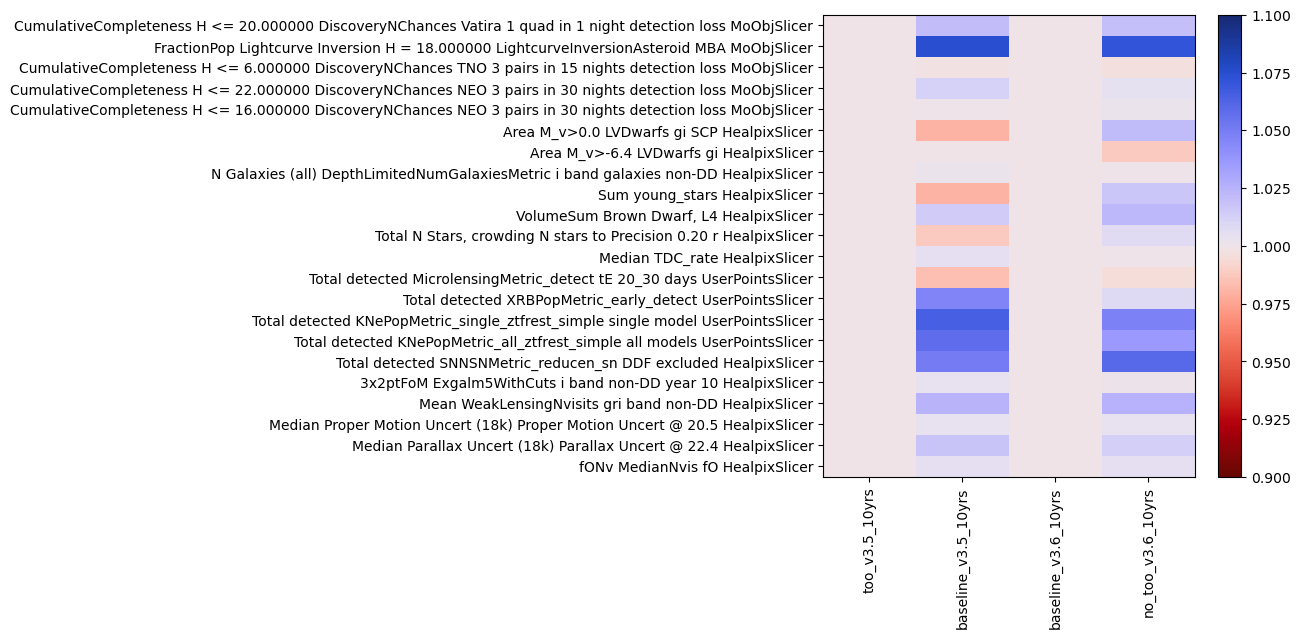

In [7]:
# Example of a high-level SCOC comparison, comparing with/without ToOs within each set.
msub = metrics.loc['SCOC']
s1 = maf.normalize_metric_summaries(baseline_run=ref35, summary=summaries.loc[v35, msub['metric']], metric_subsets=msub)
s2 = maf.normalize_metric_summaries(baseline_run=ref36, summary=summaries.loc[v36, msub['metric']], metric_subsets=msub)
ss = pd.concat([s1, s2])
maf.plot_run_metric_mesh(ss, color_range=0.2)

In [8]:
# check on contents of DESC WFD -- I believe this matches Michelle's version
metrics.loc['DESC WFD']

,metric,short_name,style,invert,mag
metric,,,,,
Median Exgalm5WithCuts i band non-DD year 10 HealpixSlicer,Median Exgalm5WithCuts i band non-DD year 10 H...,Median coaddedM5 i band,b-.,False,True
Rms Exgalm5WithCuts i band non-DD year 10 HealpixSlicer,Rms Exgalm5WithCuts i band non-DD year 10 Heal...,RMS coaddedM5 i band,b:,True,True
Effective Area (deg) Exgalm5WithCuts i band non-DD year 10 HealpixSlicer,Effective Area (deg) Exgalm5WithCuts i band no...,Effective survey area,r-,False,False
3x2ptFoM Exgalm5WithCuts i band non-DD year 10 HealpixSlicer,3x2ptFoM Exgalm5WithCuts i band non-DD year 10...,3x2pt FoM,r-.,False,False
N Galaxies (all) DepthLimitedNumGalaxiesMetric i band galaxies non-DD HealpixSlicer,N Galaxies (all) DepthLimitedNumGalaxiesMetric...,NGal in exgal footprint,g:,False,False
Mean WeakLensingNvisits gri band non-DD HealpixSlicer,Mean WeakLensingNvisits gri band non-DD Healpi...,Mean NVisits (WL),m:,False,False
Total detected SNNSNMetric_reducen_sn DDF excluded HealpixSlicer,Total detected SNNSNMetric_reducen_sn DDF excl...,Total SNIa,k-,False,False
Median SNNSNMetric_reducezlim DDF excluded HealpixSlicer,Median SNNSNMetric_reducezlim DDF excluded Hea...,Median z_lim SNIa,k--,False,False
Total detected SNSLMetric HealpixSlicer,Total detected SNSLMetric HealpixSlicer,Total SN-SL,k:,False,False


In [10]:
# michelle's smaller subset:
msub = metrics.loc['DESC WFD'].iloc[[3, 5, 8, 9]]
msub

,metric,short_name,style,invert,mag
metric,,,,,
3x2ptFoM Exgalm5WithCuts i band non-DD year 10 HealpixSlicer,3x2ptFoM Exgalm5WithCuts i band non-DD year 10...,3x2pt FoM,r-.,False,False
Mean WeakLensingNvisits gri band non-DD HealpixSlicer,Mean WeakLensingNvisits gri band non-DD Healpi...,Mean NVisits (WL),m:,False,False
Total detected SNSLMetric HealpixSlicer,Total detected SNSLMetric HealpixSlicer,Total SN-SL,k:,False,False
Total detected KNePopMetric_all_ztfrest_simple all models UserPointsSlicer,Total detected KNePopMetric_all_ztfrest_simple...,Total detected KNePopMetric_all_ztfrest_simple,g--,False,False


In [14]:
baseline_dict = {'retro_baseline_v2.0_10yrs': 'v1.x', 
                 'baseline_v2.0_10yrs':'v2.0', 
                 #'baseline_v2.1_10yrs':'v2.1',
                 #'baseline_v2.2_10yrs':'v2.2',
                 'baseline_v3.0_10yrs':'v3.0',
                 'baseline_v3.2_10yrs':'v3.2',
                'baseline_v3.3_10yrs':'v3.3',
                'baseline_v3.4_10yrs': 'v3.4',
                'baseline_v3.5_10yrs': 'v3.5',
                 'too_v3.5_10yrs': 'v3.5+ToO',
                'no_too_v3.6_10yrs': "v3.6-ToO",
                 'baseline_v3.6_10yrs': "v3.6",
                 '#four_cycle_v3.6_10yrs': "four cycles",
                #'one_snap_v3.6_10yrs' : "single snap",
                    }

rdict = {}
for k in baseline_dict:
    if not k.startswith('#'):
        rdict[k] = baseline_dict[k]

runs = list(rdict.keys())

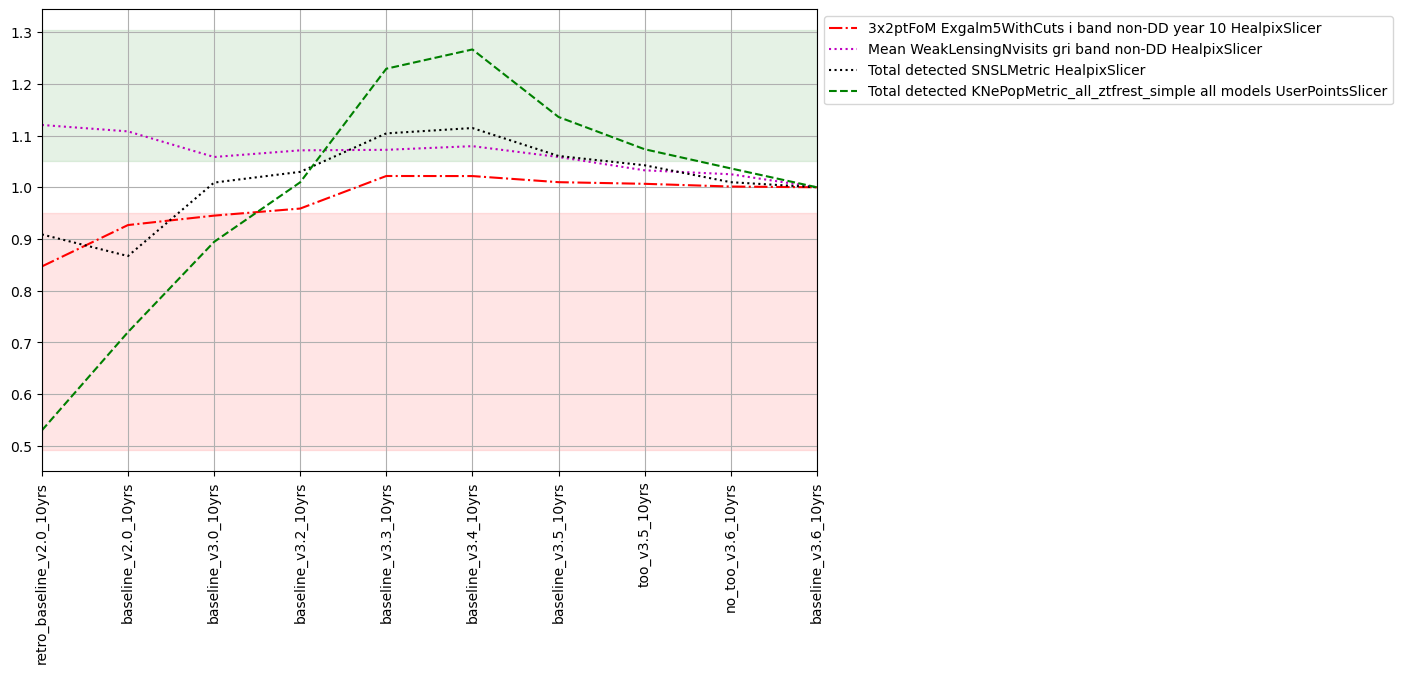

In [17]:
fig, ax = maf.plot_run_metric(summaries.loc[runs, msub['metric']],
                              baseline_run = 'baseline_v3.6_10yrs',
                              metric_subset=msub,
                              horizontal_quantity='run',
                              vertical_quantity='value')

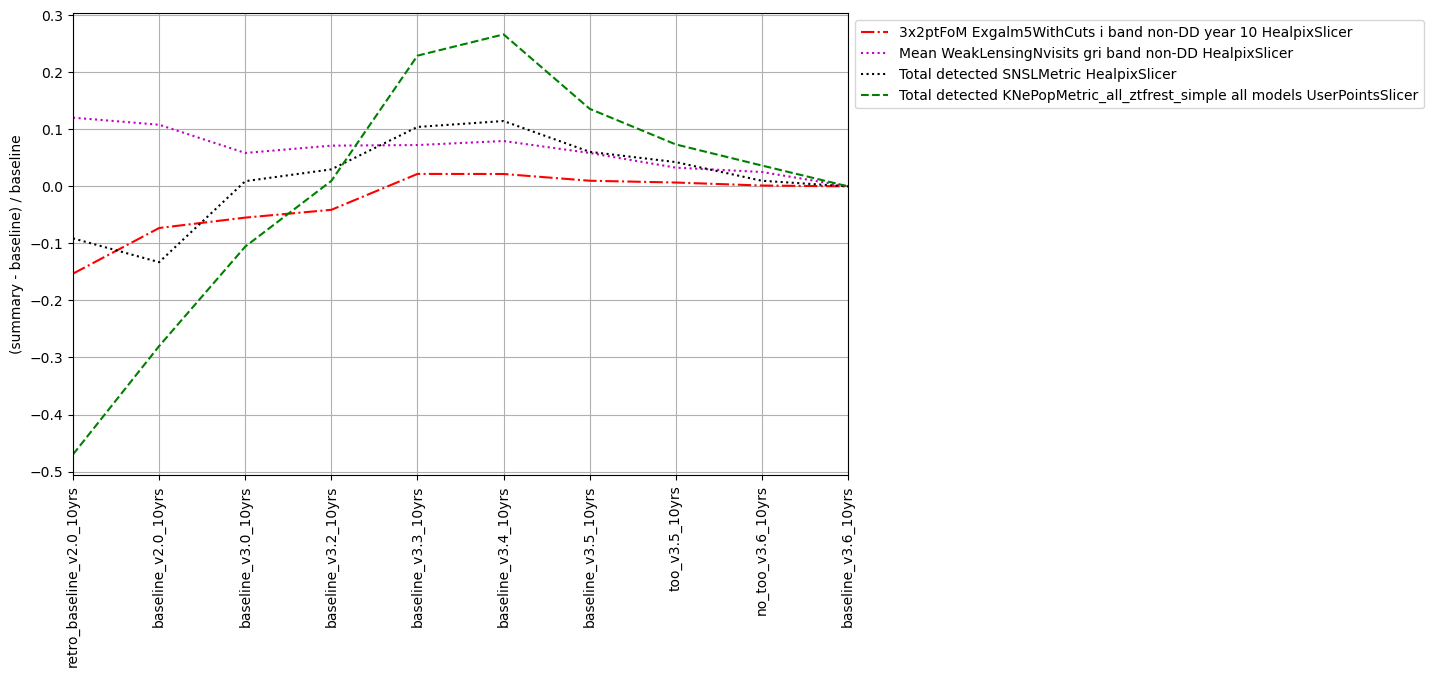

In [28]:
baseline = 'baseline_v3.6_10yrs'
df = (summaries.loc[runs, msub['metric']] - summaries.loc[baseline, msub['metric']]) / summaries.loc[baseline, msub['metric']]
fig, ax = maf.plot_run_metric(df, 
                              metric_subset=msub,
                              horizontal_quantity='run',
                              vertical_quantity='value',
                             shade_fraction=None)
_ = ax.set_ylabel("(summary - baseline) / baseline")

metric
fONv MedianNvis fO HealpixSlicer    fONv MedianNvis fO HealpixSlicer
Name: metric, dtype: object


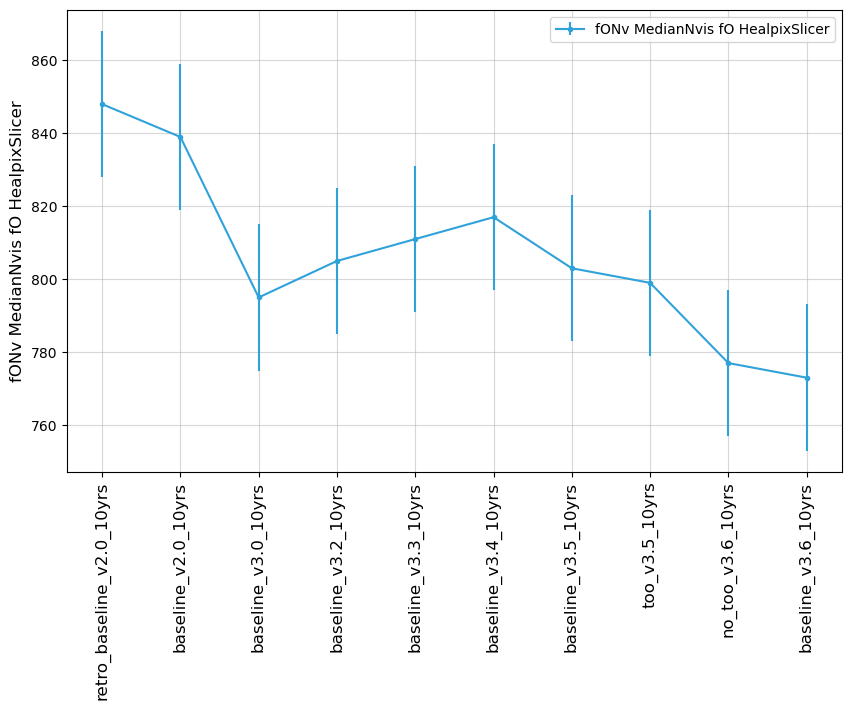

In [34]:
# median fO_nv 
msub = metrics.loc['SCOC'].query('metric.str.contains("fONv")')
print(msub['metric'])
fig, ax = maf.plot_run_metric_uncert(summaries.loc[runs, msub['metric']],
                                     uncertainty=dev[msub['metric']])

metric                     Median Median Inter-Night Gap WFD all bands HealpixSubsetSlicer
run                                                                                       
retro_baseline_v2.0_10yrs                                           3.875663              
baseline_v2.0_10yrs                                                 3.006606              
baseline_v3.0_10yrs                                                 2.955405              
baseline_v3.2_10yrs                                                 2.915962              
baseline_v3.3_10yrs                                                 2.890844              
baseline_v3.4_10yrs                                                 2.894555              
baseline_v3.5_10yrs                                                 2.979235              
too_v3.5_10yrs                                                      2.983964              
no_too_v3.6_10yrs                                                   2.999591              

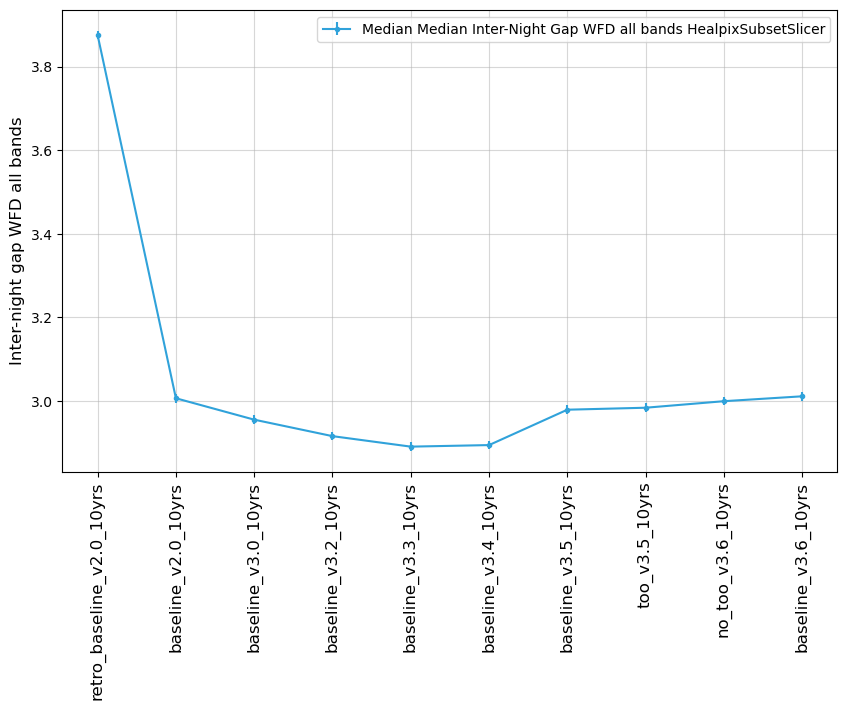

In [61]:
# median inter-night gap
msub = metrics.loc['cadence'].iloc[-1:]
print(summaries.loc[runs, msub['metric']])
print()
fig, ax = maf.plot_run_metric_uncert(summaries.loc[runs, msub['metric']],
                                     uncertainty=dev[msub['metric']])
_ = ax.set_ylabel("Inter-night gap WFD all bands")

(<Figure size 600x600 with 2 Axes>, <Axes: >)

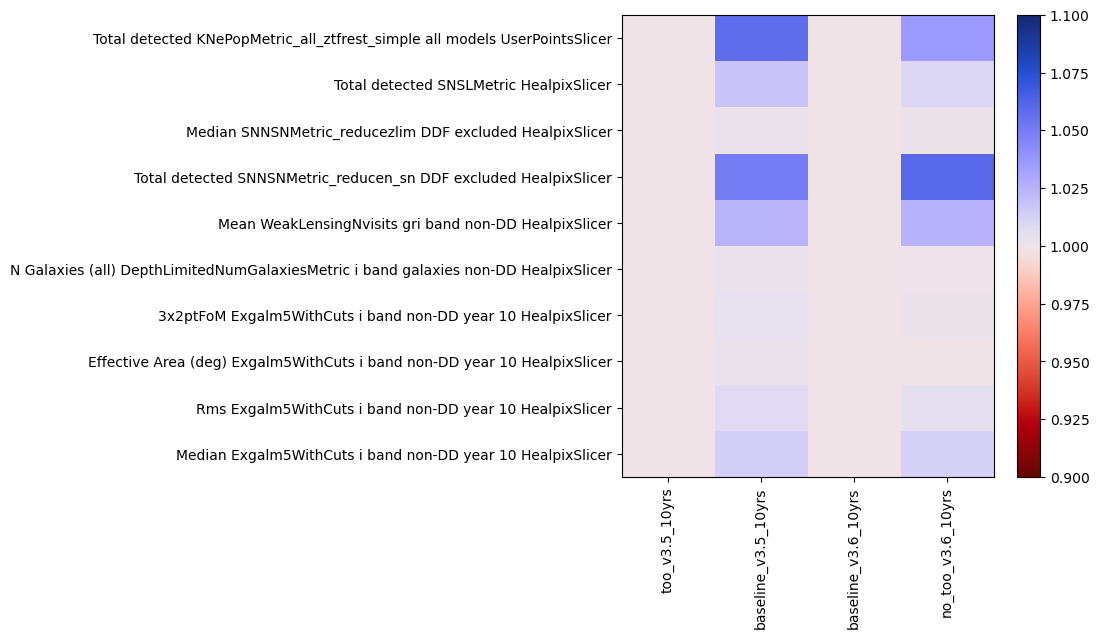

In [47]:
msub = metrics.loc['DESC WFD']
s1 = maf.normalize_metric_summaries(baseline_run=ref35, summary=summaries.loc[v35, msub['metric']], metric_subsets=msub)
s2 = maf.normalize_metric_summaries(baseline_run=ref36, summary=summaries.loc[v36, msub['metric']], metric_subsets=msub)
ss = pd.concat([s1, s2])
maf.plot_run_metric_mesh(ss, color_range=0.2)

metric
Total detected KNePopMetric_all_ztfrest_simple all models UserPointsSlicer    Total detected KNePopMetric_all_ztfrest_simple...
Name: metric, dtype: object



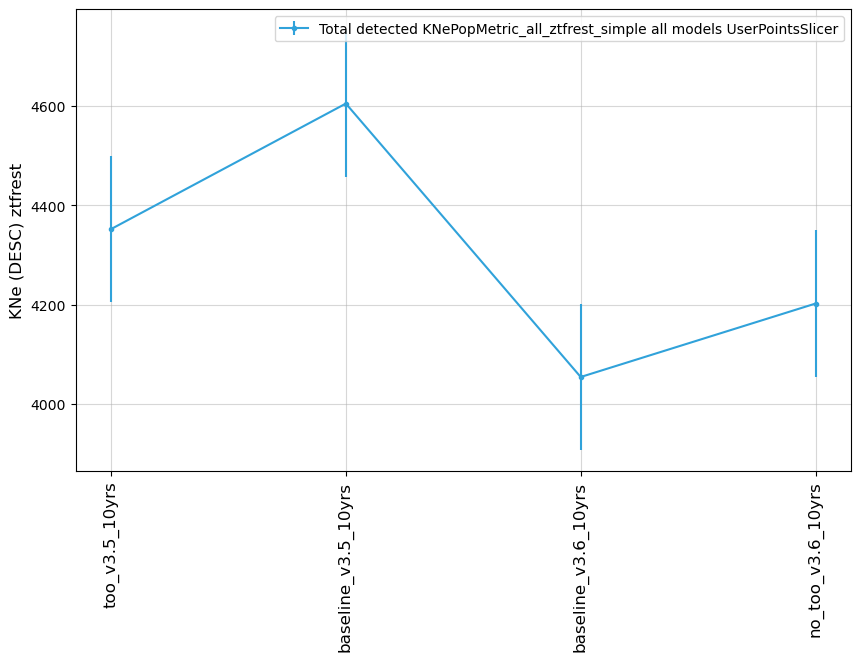

In [54]:
msub = metrics.loc['DESC WFD'].iloc[-1:]
print(msub['metric'])
print()
fig, ax = maf.plot_run_metric_uncert(summaries.loc[rr, msub['metric']],
                                     uncertainty=dev[msub['metric']])
_ = ax.set_ylabel("KNe (DESC) ztfrest")

metric
Total detected SNSLMetric HealpixSlicer    Total detected SNSLMetric HealpixSlicer
Name: metric, dtype: object



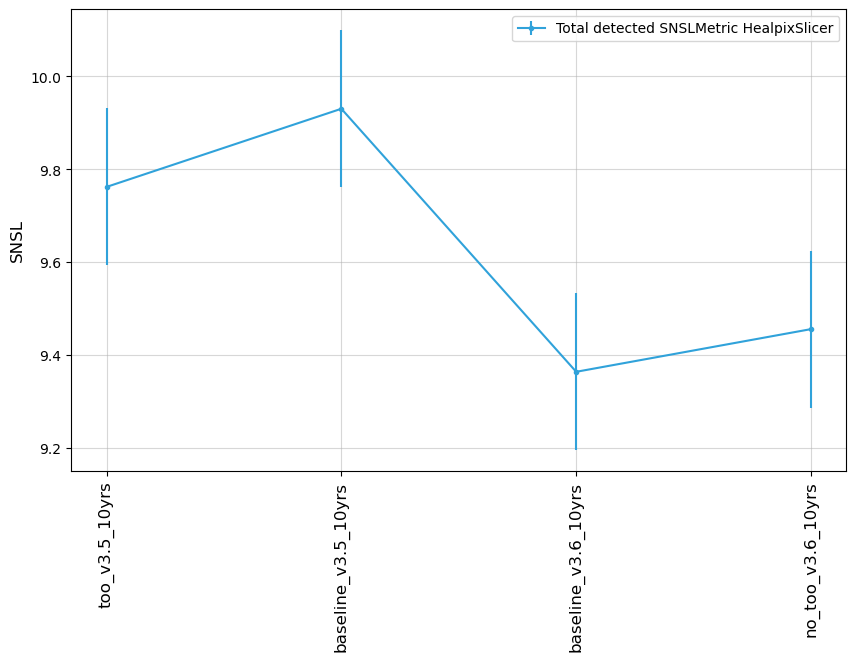

In [56]:
msub = metrics.loc['DESC WFD'].iloc[-2:-1]
print(msub['metric'])
print()
fig, ax = maf.plot_run_metric_uncert(summaries.loc[rr, msub['metric']],
                                     uncertainty=dev[msub['metric']])
_ = ax.set_ylabel("SNSL")

metric
Total detected SNNSNMetric_reducen_sn DDF excluded HealpixSlicer    Total detected SNNSNMetric_reducen_sn DDF excl...
Name: metric, dtype: object



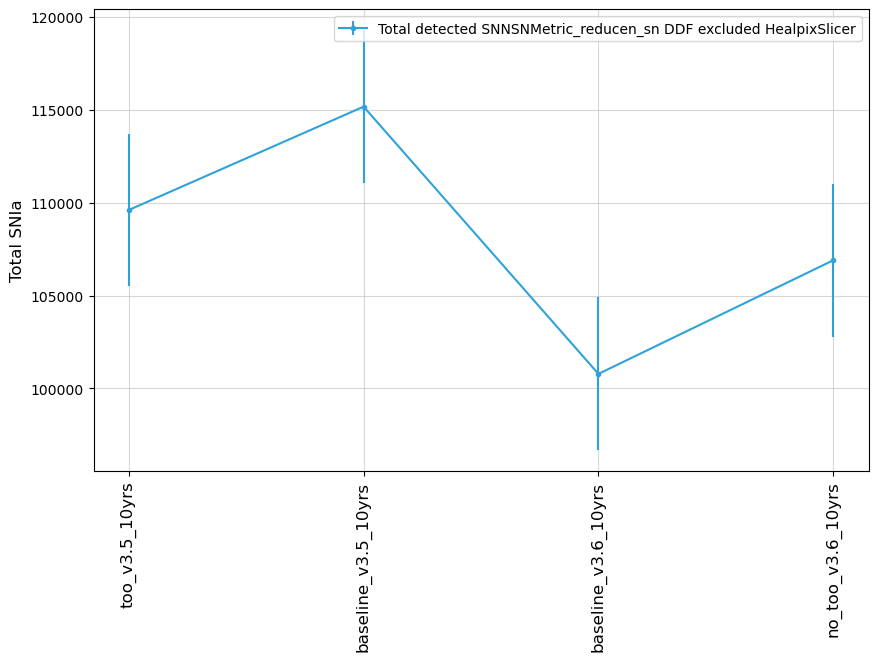

In [69]:
msub = metrics.loc['DESC WFD'].iloc[6:7]
print(msub['metric'])
print()
fig, ax = maf.plot_run_metric_uncert(summaries.loc[rr, msub['metric']],
                                     uncertainty=dev[msub['metric']])
_ = ax.set_ylabel("Total SNIa")

metric
Median SNNSNMetric_reducezlim DDF excluded HealpixSlicer    Median SNNSNMetric_reducezlim DDF excluded Hea...
Name: metric, dtype: object



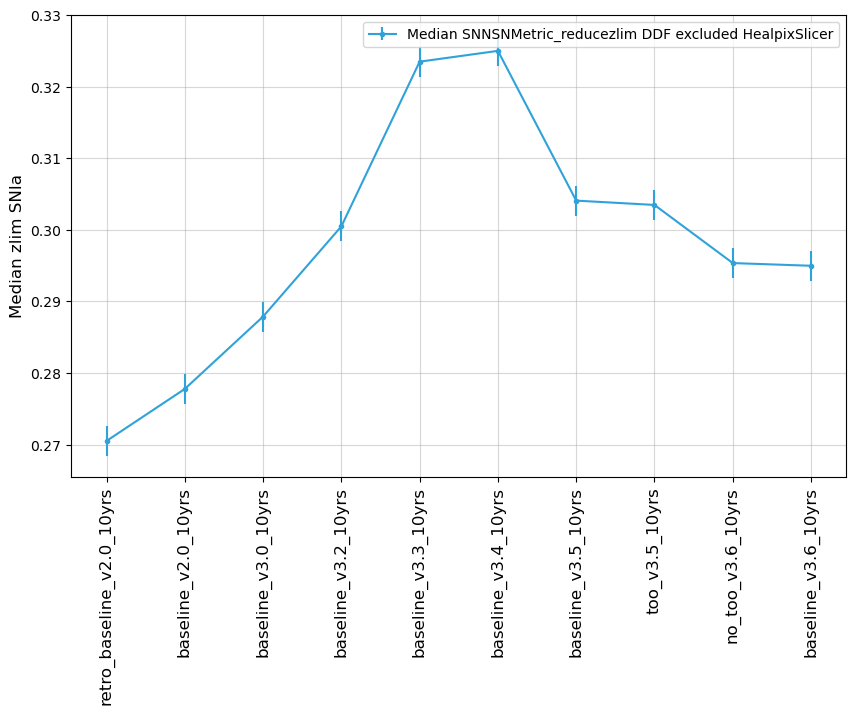

In [72]:
msub = metrics.loc['DESC WFD'].iloc[7:8]
print(msub['metric'])
print()
fig, ax = maf.plot_run_metric_uncert(summaries.loc[runs, msub['metric']],
                                     uncertainty=dev[msub['metric']])
_ = ax.set_ylabel("Median zlim SNIa")